Importing libraries

In [74]:
#data handling
import pandas as pd
import numpy as np
import os 
from PIL import Image

# Machine learning (non deep learning)
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 

# Deep learning
import tensorflow as tf
import keras
from keras import layers
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# misc
import time # for recording model training time

Read in csv data from file

In [75]:
tumor_labels = pd.read_csv("dataset/label.csv")

In [76]:
tumor_labels

,file_name,label
0,IMAGE_0000.jpg,meningioma_tumor
1,IMAGE_0001.jpg,no_tumor
2,IMAGE_0002.jpg,meningioma_tumor
3,IMAGE_0003.jpg,glioma_tumor
4,IMAGE_0004.jpg,meningioma_tumor
...,...,...
2995,IMAGE_2995.jpg,no_tumor
2996,IMAGE_2996.jpg,meningioma_tumor
2997,IMAGE_2997.jpg,glioma_tumor
2998,IMAGE_2998.jpg,glioma_tumor


In [77]:
for i in range(len(tumor_labels)):
    if (tumor_labels.iloc[i]["label"] == "no_tumor"):
        tumor_labels.iloc[i]["label"] = "no tumor"
    else: 
        tumor_labels.iloc[i]["label"] = "tumor"

In [78]:
tumor_labels

,file_name,label
0,IMAGE_0000.jpg,tumor
1,IMAGE_0001.jpg,no tumor
2,IMAGE_0002.jpg,tumor
3,IMAGE_0003.jpg,tumor
4,IMAGE_0004.jpg,tumor
...,...,...
2995,IMAGE_2995.jpg,no tumor
2996,IMAGE_2996.jpg,tumor
2997,IMAGE_2997.jpg,tumor
2998,IMAGE_2998.jpg,tumor


In [79]:
img_reshape_size = (32,32)

data = []
result = []

encoder = OneHotEncoder()
encoder.fit([[0], [1], [2], [3]]) 

# path to non tumor files
no_tumor_image_dir = "dataset/split_data/multi-class/no_tumor"
no_tumor_files = os.listdir(no_tumor_image_dir)

# path to meningioma files
meningioma_image_dir = "dataset/split_data/multi-class/meningioma_tumor"
meningioma_files = os.listdir(meningioma_image_dir)

# path to glioma files
glioma_image_dir = "dataset/split_data/multi-class/glioma_tumor"
glioma_files = os.listdir(glioma_image_dir)

# path to pitulitary files
pitulitary_image_dir = "dataset/split_data/multi-class/pitulitary_tumor"
pitulitary_files = os.listdir(pitulitary_image_dir)



print("lengths of the tumors files")
print("length of meningioma tumor files " + str(len(meningioma_files)))
print("length of glioma tumor files " + str(len(glioma_files)))
print("length of pitulitary tumor files " + str(len(pitulitary_files)))
print("length of non-tumor files " + str(len(no_tumor_files)))
print("total files is " + str(len(meningioma_files)+len(glioma_files)+len(pitulitary_files)+len(no_tumor_files)))

for file in no_tumor_files:
    temp_file_path = no_tumor_image_dir + "/" +file
    #print("path is " +temp_file_path)
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    data.append(np.array(img))
    result.append(encoder.transform([[0]]).toarray())

for file in meningioma_files:
    temp_file_path = meningioma_image_dir + "/" + file
    #print("path is " +temp_file_path)
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    data.append(np.array(img))
    result.append(encoder.transform([[1]]).toarray())
        
for file in glioma_files:
    temp_file_path = glioma_image_dir + "/"  +file
    #print("path is " +temp_file_path)
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    data.append(np.array(img))
    result.append(encoder.transform([[2]]).toarray())
        
        
for file in pitulitary_files:
    temp_file_path = pitulitary_image_dir + "/"  +file
    #print("path is " +temp_file_path)
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    data.append(np.array(img))
    result.append(encoder.transform([[3]]).toarray())
        



lengths of the tumors files
length of meningioma tumor files 855
length of glioma tumor files 860
length of pitulitary tumor files 831
length of non-tumor files 454
total files is 3000


In [80]:
data = np.array(data)
result = np.array(result)
result = result.reshape(3000,4)
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [85]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(32, 32, 1), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax',  metrics = ['accuracy'])
#print(model.summary())

In [82]:
start_time = time.time()
history = model.fit(x_train, y_train, epochs = 60, batch_size = 40, verbose=1, validation_data = (x_test, y_test))
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/30
60/60 [==============================] - 41s 640ms/step - loss: 9.3868 - accuracy: 0.5621 - val_loss: 2.0046 - val_accuracy: 0.3767
Epoch 2/30
60/60 [==============================] - 39s 650ms/step - loss: 0.8781 - accuracy: 0.7063 - val_loss: 0.8034 - val_accuracy: 0.6933
Epoch 3/30
60/60 [==============================] - 42s 704ms/step - loss: 0.5519 - accuracy: 0.7829 - val_loss: 0.7001 - val_accuracy: 0.7633
Epoch 4/30
60/60 [==============================] - 44s 737ms/step - loss: 0.4924 - accuracy: 0.8229 - val_loss: 0.7207 - val_accuracy: 0.7917
Epoch 5/30
60/60 [==============================] - 46s 760ms/step - loss: 0.3983 - accuracy: 0.8483 - val_loss: 0.7425 - val_accuracy: 0.8067
Epoch 6/30
60/60 [==============================] - 46s 766ms/step - loss: 0.3158 - accuracy: 0.8783 - val_loss: 0.8247 - val_accuracy: 0.8017
Epoch 7/30
60/60 [==============================] - 47s 776ms/step - loss: 0.2852 - accuracy: 0.8921 - val_loss: 0.8126 - val_accuracy: 0.8117

94.34445095062256 seconds --- 30 epochs , 0.9033 acc , 32x32 RGB image (images are still in greyscale, just RGB format)

343.3586163520813 seconds --- 30 epcohs , 0.9182 acc , 64x64 RGB image (images are still in greyscale, just RGB format)

1364.8851137161255 seconds --- 30 epochs , 0.8950 acc , 128x128 Greyscale image

313.81851744651794 seconds --- 30 epochs , 0.8750 acc , 64x64 Greyscale image

87.09897923469543 seconds --- 30 epochs , 0.8833 acc , 32x32 Greyscale image

31.2696533203125 seconds --- 30 epochs , 0.8200 acc , 16x16 Greyscale image

183.15469479560852 seconds --- 60 epochs , 0.9117 acc , 32x32 Greyscale image

In [7]:
tumor_labels['label'] = np.where(tumor_labels['label'] == "no_tumor", "no tumor", tumor_labels['label'])
tumor_labels['label'] = np.where(tumor_labels['label'] != "no tumor", "tumor", tumor_labels['label'])

Text(0.5, 1.0, 'Tumor dataset - probability')

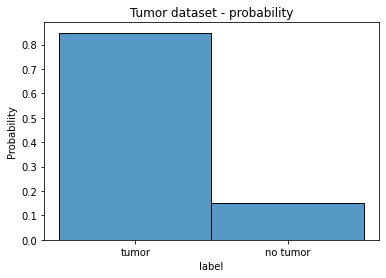

In [10]:
sns.histplot(tumor_labels[tumor_labels.columns[1]], stat="probability").set_title('Tumor dataset - probability')